# Domain: Social Network
Project 05: Facebook data
Dataset contains pseudo Facebook data.

Attribute Information:
Userid : ID of user
Age : User’s age(years)
dob_day : Day of date of birth(1-31)
dob_year : Year of date of birth 
dob_month : Month of date of birth 
gender : M/F
tenure : How long have facebook users been on site
friend_count : Total number of friends 
friendships_initiated : Friend requests sent
likes : Total number of likes by user
likes_received : Total number of likes received by user 
mobile_likes : Number of likes by user(through mobile)
mobile_likes_received : Number of likes recieved by user(through mobile) 
www_likes : Number of likes by user(through desktop website) 
www_likes_received : Number of likes received by user(through desktop)
    
Exploration ideas:
Date of birth analysis Friend count analysis
Tenure analysis
Data transformations
Frequency polygons, Boxplots.

In [2]:
#Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats
%matplotlib inline

In [4]:
#Read the input file in variable facebook

path = 'pseudo_facebook.tsv'
facebook = pd.read_csv(path,sep='\t',parse_dates=[[3,4,2]])
facebook.tail()

,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945-04-04,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995-03-12,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998-05-10,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990-04-11,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974-05-15,1397896,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [5]:
#facebook variable no of rows and columns
facebook.shape

(99003, 13)

In [6]:
#facebook variable column variables and data types
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 13 columns):
dob_year_dob_month_dob_day    99003 non-null datetime64[ns]
userid                        99003 non-null int64
age                           99003 non-null int64
gender                        98828 non-null object
tenure                        99001 non-null float64
friend_count                  99003 non-null int64
friendships_initiated         99003 non-null int64
likes                         99003 non-null int64
likes_received                99003 non-null int64
mobile_likes                  99003 non-null int64
mobile_likes_received         99003 non-null int64
www_likes                     99003 non-null int64
www_likes_received            99003 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 9.8+ MB


In [7]:
#Renaming the date of birth coumn to shorter name as DOB and further setting index of te dataframe as userid

facebook.rename(columns = {'dob_year_dob_month_dob_day':'DOB'},inplace=True)
facebook = facebook.set_index('userid')
facebook.head()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,
2094382,1999-11-19,14,male,266.0,0,0,0,0,0,0,0,0
1192601,1999-11-02,14,female,6.0,0,0,0,0,0,0,0,0
2083884,1999-11-16,14,male,13.0,0,0,0,0,0,0,0,0
1203168,1999-12-25,14,female,93.0,0,0,0,0,0,0,0,0
1733186,1999-12-04,14,male,82.0,0,0,0,0,0,0,0,0


In [8]:
#Use describe function to see the various aspects of facebbok data

facebook.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


# Analysis of Age Pattern

((array([-4.34382198, -4.14495029, -4.03677898, ...,  4.03677898,
          4.14495029,  4.34382198]),
  array([ 13,  13,  13, ..., 113, 113, 113], dtype=int64)),
 (20.675656879143229, 37.28022383160107, 0.91523136621818535))

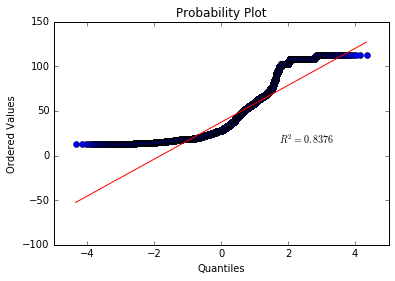

In [24]:
import scipy.stats as stats
stats.probplot(facebook['age'],dist='norm',plot=plt)

# This shows that the age is not normally distributed. However, the normal distribution here has a high R-square. in the mid-section